__Note by George Chen (CMU 95-865 Fall 2017 instructor):__
This handwritten digit demo is *heavily* based on an
existing article but for which I largely and intentionally
delayed introduction of *label information* in the data
(i.e., the "ground truth" part of the data that says which
digit 0, 1, ..., 9 that each image corresponds to) since
in practice when we first get unstructured data, we often
do not have/know what the labels should be! The original
article is here (one of the first things they do is read
in the labels; also I removed the dependence on Pandas and
`ggplot` as it's not needed here):
https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [17]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")#28*28 pixel
feature_vectors = mnist.data / 255.0 #normalization

# we will work with a subsample of the data
np.random.seed(95865)
#permutation: Randomly permute a sequence, or return a permuted range.
random_sample = np.random.permutation(len(feature_vectors))[:1000]  # 1000 random indices

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')  # prettier plots

In [19]:
np.random.randint(1000)
len(random_sample)
feature_vectors.shape #(70000, 784)

(70000, 784)

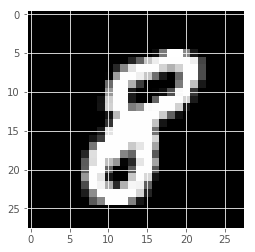

In [20]:
# you can re-run this to see random digits
# randint: Return a random integer from low (inclusive) to high (exclusive)
plt.imshow(feature_vectors[np.random.randint(len(feature_vectors))].reshape(28, 28), cmap='gray')

In [21]:
from sklearn.decomposition import PCA
#transform 784(28*28) dimensions into 2 dimensions
pca = PCA(n_components=2)  # project data down to 2 dimensions
feature_vectors_pca2d = pca.fit_transform(feature_vectors[random_sample])

In [22]:
feature_vectors_pca2d.shape

(1000, 2)

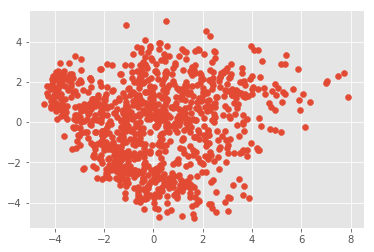

In [23]:
plt.scatter(feature_vectors_pca2d[:, 0], feature_vectors_pca2d[:, 1])

In [24]:
pca.explained_variance_ratio_

array([ 0.09855539,  0.07427912])

In [25]:
from sklearn.manifold import TSNE
#perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms
#verbose: track the progress of algorithm
tsne = TSNE(n_components=2, verbose=1, perplexity=40) 
feature_vectors_tsne2d = tsne.fit_transform(feature_vectors[random_sample])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.012s...
[t-SNE] Computed neighbors for 1000 samples in 1.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.838629
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.785599
[t-SNE] Error after 1000 iterations: 1.091455


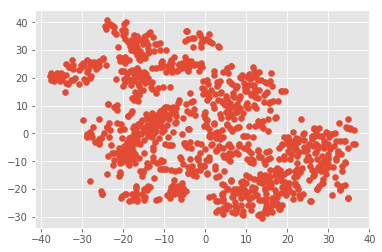

In [26]:
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1])

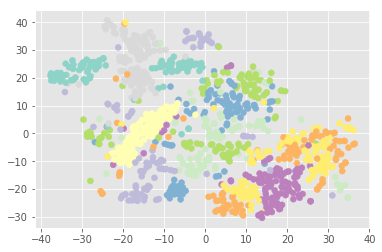

In [27]:
# here we color each low-dimensional t-SNE point differently depending on its true known label for what digit the point corresponds to
# (in many applications we do not have this sort of label information!)
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1], c=[str(i) for i in mnist.target[random_sample]], cmap='Set3')

Coordinate is hard to interpret, you can only know which image is closer to which image~cluster.

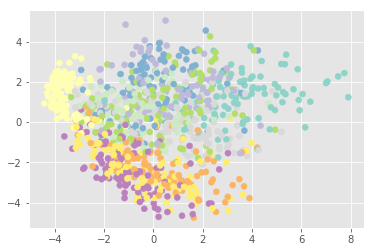

In [29]:
# coloring the points by true digit label, now for PCA
plt.scatter(feature_vectors_pca2d[:, 0], feature_vectors_pca2d[:, 1], c=[str(i) for i in mnist.target[random_sample]], cmap='Set3')